# 선형 분류와 선형 회귀의 차이

선형 회귀와 선형 분류 모두 입력 변수와 출력 변수 간의 관계를 모델링하는 데 사용되는 선형 모델이다.<br>
선형 회귀는 연속적인 출력 값을 예측하는 회귀 문제를 다룬다. 그리고 선형 분류는 이진 분류와 다중 클래스 분류로 구분된다. 이진 분류는 입력 값을 두 개의 클래스 중 하나로 분류하는 문제를 다룬다. 다중 클래스 분류는 입력 갑을 둘 이상의 클래스 중 하나로 분류하는 문제를 다룬다.<br>
둘의 차이점은 출력 변수의 성격이다. 선형 회귀는 연속적인 출력값을 예측하는 반면, 선형 분류는 이산적인 클래스 값을 예측한다. 이에 따라, 선형 회귀에는 주로 MSE와 같은 회귀용 손실 함수를 사용하고, 선형 분류에는 주로 크로스 엔트로피와 같은 분류용 손실 함수를 사용한다.

# 선형 분류 종류
1. 로지스틱 회귀
2. 서포트 벡터 머신
3. 퍼셉트론
4. 선형 판별 분석

# 선형 결정 경계
입력 데이터를 분류하기 위해 분류 경계를 그리는데 사용되는 선형 함수<br>
입력 데이터를 평면 상에 투영한 후, 해당 데이터를 분류하기 위한 선을 그리는 것. 이때 분류 경계는 선형이기 때문에 간단하고 빠르게 학습할 수 있다. 하지만 입력 데이터가 복잡한 패턴을 가지거나 비선형적인 관계를 가지는 경우 선형 결정 경계는 제대로 분류할 수 없는 한계가 있다.<br>
따라서, 비선형적인 관계를 가지는 입력 데이터를 분류하기 위해서는 비선형 결정 경계를 사용해야 한다. 이를 위해서는 보다 복잡한 모델을 사용하거나, 입력 데이터를 고차원으로 변환하는 기법을 사용하는 등의 방법이 있다.

# 선형 분류 - 로지스틱 회귀
분류 문제를 해결하는 모델 중 하나로, 이진 분류에서 많이 사용된다. 선형 회귀 모데렝서 출력값을 sigmoid 함수를 사용하여 0과 1 사이의 값으로 제한한 모델이다. 즉, 입력 변수 x에 대해 0과 1 사이의 값인 y를 예측하는 모델이다.<br>
로지스틱 회귀는 선형 회귀 모델과 마찬가지로 입력 변수 x와 가중치 w를 곱한 값을 모두 더한 뒤, 시그모이드 함수를 적용하여 y를 예측한다. 이 때, 시그모이드 함수는 입력값이 크면 1에 가까워지고 작으면 0에 가까워지는 특징을 갖고 있어, 0과 1 사이의 값으로 출력이 제한된다. 로지스틱 회귀는 이진 분류 문제에서는 매우 강력한 성능을 보이며, 다중 분류 문제에서도 일부 변형하여 사용할 수 있다. 또한, 회귀 분석에서도 종속 변수가 0과 1 사이의 값으로 제한되는 경우에 로지스틱 회귀를 사용할 수 있다.
- 입력 변수 (input variable) : 분류에 사용되는 데이터의 특징
- 가중치 (Weights) : 각 입력 변수의 영향력을 나타내는 값
- 편향 (Bias) : 모델의 적합도를 조정하는 상수항
- 시그모이드 함수 (Sigmoid function) : 입력 값을 0과 1 사이로 변환하는 함수
- 로그 손실 함수 (Log loss function) : 모델의 오차를 계산하는 함수

## Python과 Pytorch를 활용한 Rogistic Regression model 구현

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader

### 데이터셋을 만들기
make_classification 함수를 사용하여 무작위로 데이터셋을 만들기

In [2]:
x, y = make_classification(n_samples=3000,          # 생성할 데이터 수
                          n_features=5,             # 독립변수 수
                          n_informative=2,          # 독립변수 수 중에서 실제로 유이미한 의미가 있는 변수 계수
                          n_redundant=0,            # 독립변수 중에 다른 독립 변수로부터 파생된 불필요한 독립변수 계수
                          n_clusters_per_class=1,   # 클래스당 클러스트 계수
                          random_state=42)          # 난수 생성 발생기의 시드값

print(x)
print(y)

[[-0.02439857 -0.57540077  1.26796049 -1.42222965 -0.9629849 ]
 [-1.07638119  0.3872175   1.08299994 -0.67379011 -2.65098736]
 [-1.12984986 -0.26922916  1.12735009 -0.82383687 -1.70574586]
 ...
 [-0.53797853  0.26401859 -0.48915618  0.4664446  -1.57451325]
 [ 0.01920342  0.9761859  -0.14717165 -1.51725386  2.31873002]
 [-0.37051336  0.93603022 -0.62133172 -0.23084897  1.66473405]]
[0 0 0 ... 0 1 1]


### 데이터셋을 train set과 test set으로 나눔

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train >> ", len(x_train))
print("x_test >> ", len(x_test))
print("y_train >> ", len(y_train))
print("y_test >> ", len(y_test))

x_train >>  2400
x_test >>  600
y_train >>  2400
y_test >>  600


### Pytorch의 Dataset과 Dataloader를 사용하기 위한 Custom Dataset 구현

In [4]:
class MyCustomDataset(Dataset) :
    def __init__(self, x, y):
        # 텐서형태로 변환
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        print(self.x, self.y)
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)
    
    
    
# 데이터셋 정의
train_dataset = MyCustomDataset(x_train, y_train)
test_dataset = MyCustomDataset(x_test, y_test)

# 데이터 로드 정의
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)


############ 디버깅 코드 #############
# test = MyCustomDataset(x_test, y_test)
# for i in test:
#     print(i)
############ 디버깅 코드 #############
for index, (datas, labels) in enumerate(test_loader):
    print(index, datas, labels)

tensor([[ 0.7075,  1.2127, -0.6756,  0.3749,  0.7775],
        [-0.1092,  0.8279,  0.4622,  1.1346,  0.0994],
        [-1.8629,  0.1843,  0.8259, -0.5348,  1.6433],
        ...,
        [ 1.6923,  0.9449, -1.3617, -0.2597,  0.3556],
        [-0.8839,  1.9900,  1.6815,  0.1473, -0.2362],
        [-0.1104,  0.1290,  0.3199, -0.1956,  0.9334]]) tensor([1., 1., 1.,  ..., 1., 0., 1.])
tensor([[-0.1814,  0.9541, -0.8362,  0.9478,  1.1666],
        [-1.0747, -0.5975, -0.0673, -0.7824, -1.8099],
        [ 2.0192,  1.4252,  0.7749,  0.9027,  0.9276],
        ...,
        [ 1.1968,  1.1594,  1.5280,  0.4321,  0.3262],
        [-0.0243,  0.9452,  1.2092,  1.6390, -0.5826],
        [ 0.5011,  1.5814,  1.5891, -0.4866, -0.2943]]) tensor([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 0

### 모델 정의
5개의 특성을 가진 데이터셋을 가정하고, 1개의 뉴런을 가진 출력층을 만든다.

In [5]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x) :
        out = self.linear(x)
        out = torch.sigmoid(out)
        
        return out
    
model = LogisticRegression(input_dim=5)
print(model)    
    

LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)


### 모델을 학습시키기 전에 학습에 필요한 Loss function, optimizer 선언

In [6]:
from adamp import SGDP
"""
# define your params
optimizer = SGDP(params, lr=0.1, weight_decay=1e-5, momentum=0.9, nesterov=True)
"""
criterion = nn.BCELoss() # 사용한 이유는 0과 1 분류 이진분류 하기 떄문입니다. 
# optimizer = SGDP(model.parameters(), lr=0.25, weight_decay=1e-5, momentum=0.9, nesterov=True)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5, momentum=0.9, nesterov=True)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: True
    weight_decay: 1e-05
)


In [10]:
num_epochs = 100

for epoch in range(num_epochs) : 
    for inputs, targets in train_loader : 
#         print(targets)
#         print("unsqueeze >> ", targets.unsqueeze(1))
        # optimizer 초기화 진행 
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        
        optimizer.step()
    
    if epoch % 10 == 0 :
        print(f"Epoch : [{epoch+1}/{num_epochs}], Loss : [{loss.item():.4f}]")

Epoch : [1/100], Loss : [0.2619]
Epoch : [11/100], Loss : [0.1262]
Epoch : [21/100], Loss : [0.3489]
Epoch : [31/100], Loss : [0.3185]
Epoch : [41/100], Loss : [0.2750]
Epoch : [51/100], Loss : [0.1138]
Epoch : [61/100], Loss : [0.2885]
Epoch : [71/100], Loss : [0.2426]
Epoch : [81/100], Loss : [0.2374]
Epoch : [91/100], Loss : [0.2053]


### 평가 코드 작성

In [11]:
# device on GPU? CPU?
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device >> ", device)

Using device >>  cpu


In [13]:
model.eval()
with torch.no_grad() : 
    correct = 0
    total = 0
    for test_inputs, test_targets in test_loader : 
#         print(test_inputs, test_targets)
        test_input, test_target = test_inputs.to(device), test_targets.to(device)
        outputs_test = model(test_input)
        _, pred_test = torch.max(outputs_test, 1)
        total += test_targets.size(0)
        correct += (pred_test == test_targets).sum().item()
        
    print("Acc >> %d%%"%(100 * correct / total))

Acc >> 48%


## 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행
Fashion-MNIST 데이터셋을 활용하여 로지스틱 회귀 모델 구현 실습
> Fashion-MNIST는 의류 이미지를 분류하기 위한 데이터셋이다. 각 이미지는 28x28 크기의 흑백 이미지이며, 총 10개의 클래스로 구성되어 있다.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transform
import matplotlib.pyplot as plt

In [15]:
# 데이터셋 다운로드 및 Dataloader 생성
train_dataset = dsets.FashionMNIST(root ="./data", train=True, transform=transform.ToTensor(), download=True)
test_dataset = dsets.FashionMNIST(root ="./data", train=False, transform=transform.ToTensor(), download=True)

In [16]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)

### 모델 정의

In [17]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) :
        out = self.linear(x)
        return out

### 하이퍼파라미터 설정

In [18]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### 모델, 손실 함수, 옵티마이저 정의

In [19]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device : ", device)
model.to(device)

Using device :  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### train loop

Epoch [1/10], Step [100/600], Loss: 0.8485, Train Acc : 0.6600
Epoch [1/10], Step [200/600], Loss: 0.5763, Train Acc : 0.7500
Epoch [1/10], Step [300/600], Loss: 0.8948, Train Acc : 0.7467
Epoch [1/10], Step [400/600], Loss: 1.1138, Train Acc : 0.7375
Epoch [1/10], Step [500/600], Loss: 1.1937, Train Acc : 0.7400
Epoch [1/10], Step [600/600], Loss: 0.9156, Train Acc : 0.7533
Epoch [2/10], Step [100/600], Loss: 0.8609, Train Acc : 0.8200
Epoch [2/10], Step [200/600], Loss: 1.1137, Train Acc : 0.7950
Epoch [2/10], Step [300/600], Loss: 0.9071, Train Acc : 0.8067
Epoch [2/10], Step [400/600], Loss: 0.9218, Train Acc : 0.8150
Epoch [2/10], Step [500/600], Loss: 1.6761, Train Acc : 0.7980
Epoch [2/10], Step [600/600], Loss: 1.0978, Train Acc : 0.8067
Epoch [3/10], Step [100/600], Loss: 1.0753, Train Acc : 0.8600
Epoch [3/10], Step [200/600], Loss: 2.0972, Train Acc : 0.8200
Epoch [3/10], Step [300/600], Loss: 1.5152, Train Acc : 0.8067
Epoch [3/10], Step [400/600], Loss: 1.6123, Train Acc :

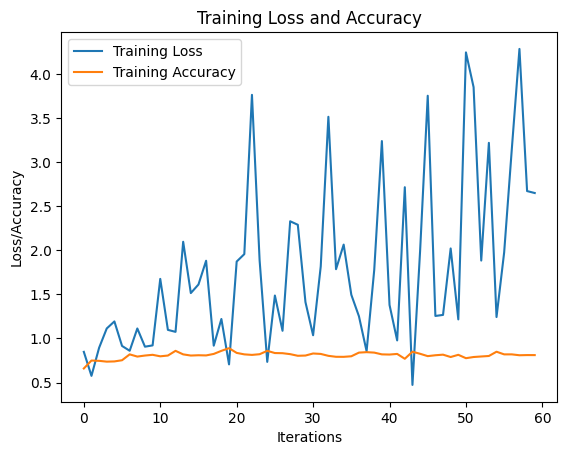

In [20]:
loss_list = []
acc_list = []

for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # 데이터 로드
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # 순전파 및 Loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()
        
        # 로그 출력
        if (i+1) % 100 == 0:
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Acc : {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            
            
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label = 'Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

## Fashion-MNIST 데이터셋을 활용하여 로지스틱 회귀 모델 구현

In [21]:
import matplotlib.pyplot as plt
import numpy as np

### 테스트 이미지 가져오기

In [22]:
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.reshape(-1, 28*28)

### 모델 예측

In [23]:
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

### 이미지와 예측값 시각화

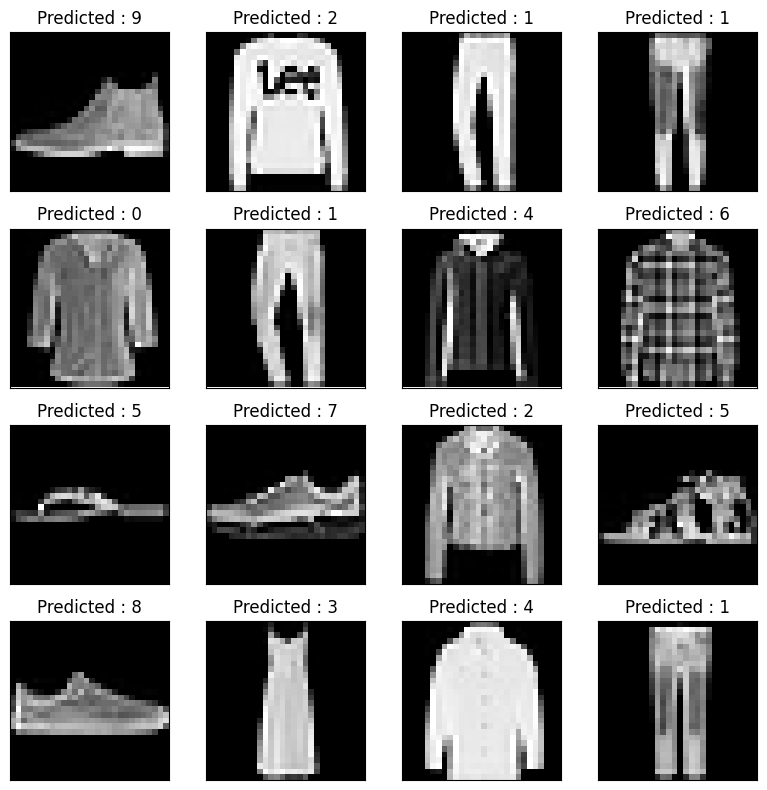

In [24]:
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize=(8,8), subplot_kw={'xticks' : [], 'yticks' : []})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicted : {predicted[i].item()}")
    
plt.tight_layout()
plt.show()

### 로지스틱 회귀 모델 정의

In [25]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

로지스틱 회귀 모델은 이진 분류 문제에서 주로 사용되지만, 다중 클래스 분류 문제에서도 사용할 수 있다. 이진 분류에서는 출력층에 sigmoid 함수를 사용하여 출력값을 0과 1 사이로 만들고, 임계값을 기준으로 이진 분류를 수행한다.<br>
하지만 다중 클래스 분류에서는 출력층에 softmax 함수를 사용하여 출력값을 다중 클래스에 대한 확률값으로 만들고, 가장 높은 확률값을 가진 클래스를 선택한다. 따라서 위의 코드에서는 출력층에 선형 계층만 사용하고 있지만, 이는 다중 클래스 분류 문제에서도 사용할 수 있다.

## 로지스틱 회귀 모델의 한계
- 선형 결정 경계를 사용하여 이진 분류 문제를 해결하는 데 주로 사용된다. 이 모델은 기본적으로 입력 특성과 가중치의 선형 조합에 시그모이드 함수를 적용하여 0과 1 사이의 확률 값을 출력한다. 그러나 이 모델은 일부 한계가 있다.
> 1. 로지스틱 회귀 모델은 선형 결정 경계를 사용하기 때문에, 선형적으로 분리되지 않은 데이터셋에서는 제대로 작동하지 않는다. 이런 경우에는 다른 비선형 모델 사용
> 2. 로지스틱 회귀 모델은 모델링 할 수 있는 관계가 선형적인 경우에만 사용할 수 있다. 따라서 입력과 출력 간의 비선형적인 관계가 있는 문제의 경우에는 다른 모델을 사용해야 한다.

### 해결 방법
1. 다른 비선형 모델로 대체
2. 다항식 항을 추가하여 비선형적인 관계를 모델링 = 다항 로지스틱 회귀 모델
3. 커널 트릭을 사용해 로지스틱 회귀 모델을 비선형 모델로 확장 = 커널 로지스틱 회귀 모델
4. 정규화를 사용해 모델의 복잡도를 제어 = L1 또는 L2 정규화. 모델이 과적합 되는것을 방지하여 일반화 성능을 향상시킨다.
5. 앙상블 기법을 사용해 로지스틱 회귀 모델을 개선할 수 있다. = 로지스틱 앙상블

## 로지스틱 앙상블
여러 개의 로지스틱 회귀 모델을 조합하여 더 나을 예측 성능을 달성하는 기법. 일반적으로 로지스틱 회귀 앙상블은 여러 개의 로지스틱 회귀 모델을 만들고, 각 모델의 예측을 조합하여 최종 예측을 수행한다.<br>
이것은 개별 로지스틱 회귀 모델보다 더 나은 성능을 발휘할 수 있다. 이는 다양한 이유로 인해 발생한다. 첫째, 여러 개의 모델이 예측한 결과를 조합하여 더욱 정확한 예측을 수행할 수 있다. 둘째, 각 모델은 데이터의 일부를 보고 예측을 수행하므로, 앙상블을 통해 전체 데이터를 더 잘 활용할 수 있다. 셋째, 각 모델은 서로 다른 특징을 강조하므로, 앙상블을 통해 전체적으로 다양한 특징을 고려할 수 있다.<br>
로지스틱 회귀 앙상블은 다른 알고리즘의 앙상블과 마찬가지로 매우 강력한 예측 성능을 발휘할 수 있다. 그러나 앙상블 모델을 구성하고 훈련하기 위해서는 더 많은 계산이 필요하고, 모델의 구성이 복잡해질 수 있으므로, 상황에 따라서는 이를 고려해야 한다.

## 로지스틱 회귀 모델의 한계 해결 방법
### 로지스틱 회귀 앙상블
로지스틱 회귀 앙상블을 구현하기 위해, 여러 개의 로지스틱 회귀 모델을 생성하고 각각의 모델로부터 예측값을 얻은 후, 이들을 조합하여 최종 예측값을 결정하는 방식이다.

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
# 하이퍼파라미터 설정
input_size = 28* 28
num_classes = 10
num_epochs = 10
lr = 0.001
num_models = 5 # 앙상블에 사용할 모델의 개수

# 데이터셋 불러오기
dataset = FashionMNIST(root='./data', train=True, transform=ToTensor(), download = True)
train_set, val_set = train_test_split(dataset, test_size=0.2, random_state=42)

# 데이터 로더 생성
train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
val_loader = DataLoader(val_set, batch_size=100, shuffle=False)

# 앙상블 모델 생성
models = [LogisticRegression(input_size, num_classes) for _ in range(num_models)]

# 모델, 손실함수, 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizers = [optim.SGD(model.parameters(), lr=lr) for model in models]

# 학습
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 데이터 로드
        images = images.reshape(-1, input_size)
        labels = labels
        
        # 순전파 및 손실 계산
        for j in range(num_models):
            outputs = models[j](images)
            loss = criterion(outputs, labels)
            
            # 역전파 및 가중치 업데이트
            optimizers[j].zero_grad()
            loss.backward()
            optimizers[j].step()
            
    # 검증
    with torch.no_grad():
        total, correct = 0,0
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            outputs = torch.zeros(images.size()[0], num_classes)

            # 앙상블 모델의 예측값을 더함
            for j in range(num_models):
                outputs += models[j](images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_acc:.2f}%")

Epoch [1/10], Validation Accuracy: 64.53%
Epoch [2/10], Validation Accuracy: 65.72%
Epoch [3/10], Validation Accuracy: 66.45%
Epoch [4/10], Validation Accuracy: 67.58%
Epoch [5/10], Validation Accuracy: 68.57%
Epoch [6/10], Validation Accuracy: 69.75%
Epoch [7/10], Validation Accuracy: 71.03%
Epoch [8/10], Validation Accuracy: 71.84%
Epoch [9/10], Validation Accuracy: 72.58%
Epoch [10/10], Validation Accuracy: 73.28%
